# KERNEL 2 - TILED SHARED MEMORY CONVOLUTION

## 1. Lí do chọn.
- Giảm thiểu số lần truy cập vào `Global Memory` bằng cách lưu dữ liệu đầu vào và trọng số convolution vào `Shared Memory` là **smem[]**.
- Việc này có thể giúp chương trình convolution thực hiện nhanh hơn vì việc truy cập vào `Global Memory` nhiều lần hao tốn thời gian hơn so với truy cập `Shared Memory`.

## 2. Kết quả thực thi.
- Kết quả chương trình:
- Thời gian thực thi CONVOLUTION 1:
- Thời gian thực thi CONVOLUTION 2:
- Nhận xét về kết quả:
    + Về kết quả: Các lớp đặc trưng tương tự như thực thi với CPU hay GPU chưa được tối ưu.
    + Về thời gian thực thi: Khác với mong đợi, chương trình có thời gian thực thi lâu hơn so với thực thi Convolution thông thường với GPU. Điều này có thể là bởi việc lưu các dữ liệu cần thiết vào `Shared Memory` phần nào làm tăng thời gian xử lý cho mỗi *thread* bởi **__syncthreads()** khiến các *thread* phải chờ đợi để tiếp tục xử lý. Trong khi đó việc các ảnh trong bộ dữ liệu `FASHION-MNIST` có kích thước nhỏ nên ý nghĩa của việc giảm thời gian truy cập của `Shared Memory` không có quá nhiều ý nghĩa khi chênh lệch giữa chương trình ***TILE SHARED MEMORY CONVOLUTION*** có số lần truy cập bộ nhớ so với `GMEM` CONVOLUTION bằng GPU thông thường không quá nhiều.

## 3. Thiết kế chương trình.
- Tiến hành khởi tạo cấu hình kernel CUDA tương tự như kernel naive cơ bản.
- Khởi tạo vùng nhớ `Shared Memory` được cấp phát động với kích thước là tổng của 2 phần:
    + Ma trận dữ liệu vào của ảnh có kích thước như sau: 
        $ TileSize = (InputSize + KernelSize - 1)^2 $ 
    + Ma trận trọng số convolution 5x5.
- Với mỗi block, `SMEM` sẽ lưu trữ bằng cách:
    + Mỗi thread có các index nằm trong kích thước kernel, sẽ đưa dữ liệu trọng số của lớp đặc trưng **m** vào **k_s**.
    + Các dữ liệu đưa vào **x_s** bằng cách tương tự như các bài lab.
- Thực hiện tính *accumulator* ở mỗi thread với bias của lớp đặc trưng tương ứng. 

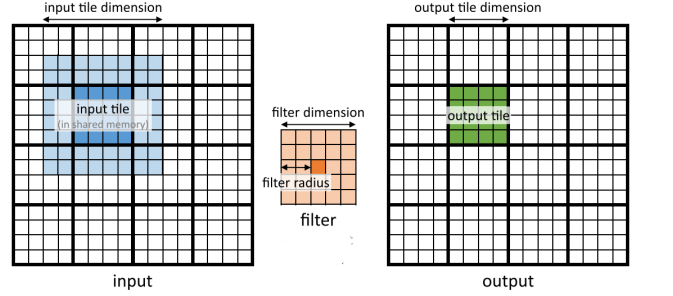